# Módulo 1: Extracción de datos

## Leyendo y operando con imágenes

#### Objetivo 

* Saber cómo se lee una imagen en términos de pixeles y colores RGB.
* Poder hacer operaciones básicas con imágenes.
    * Resizing.
    * Cropping.
    * Rotating.
    * Channel division.
* Leer histogramas por canal para visualizar saturación de elementos.

#### Prerequisitos
* Instalación de `opencv-python`.

#### Actividad de tarea
* Tómate una selfie y súbela al mismo directorio donde está guardado este notebook.
* Vas a escoger algún elemento de tu cara y ubicarlo con las coordenadas correspondientes (accediendo a la matriz). 
    * Durante la clase hicimos algo similar cuando _croppeamos_ las letras de la entrada.
* Vas a pegar ese elemento de tu cara en otra parte de tu cara (por ejemplo, un ojo en la frente). Durante la clase ehicimos algo similar con la imagen "ITESO con ITESO dentro (wtf)" Para ello te sugiero seguir los siguientes pasos:
    * Identificar el elemento de tu cara (con sus coordenadas).
    * Identificar la zona donde la vas a pegar. OJO: La zona donde lo vas a pegar tiene que ser del mismo tamaño del elemento que vas a pegar. Para esto vas a tener que usar `resize`.
        * Hicimos un ejemplo de resizing en la imagen "ITESO con ITESO dentro (wtf)".
    * Pegar en la imagen original ese elemento.
    
Te comparto (al final del notebook) el output que se espera con una imagen mía de ejemplo (una disculpa por la cara de desvelado, era de noche cuando hice esto xD).



##### Referencias
* https://www.pyimagesearch.com/2014/11/03/display-matplotlib-rgb-image/
* https://stackabuse.com/introduction-to-image-processing-in-python-with-opencv/
* https://towardsdatascience.com/11-steps-to-start-with-image-processing-9f88f16b170c
* https://likegeeks.com/python-image-processing/
* https://www.geeksforgeeks.org/python-opencv-cv2-rotate-method/
* http://www.trix.com/~stevehof47/techinfo/histograms/histograms2.htm
* http://www.trix.com/~stevehof47/techinfo/histograms/histograms.htm

-- 
* https://neptune.ai/blog/image-processing-in-python-algorithms-tools-and-methods-you-should-know

* https://docs.opencv.org/master/d3/df2/tutorial_py_basic_ops.html
* https://pythonprogramming.net/canny-edge-detection-gradients-python-opencv-tutorial/?completed=/morphological-transformation-python-opencv-tutorial/
* https://www.python-course.eu/python_image_processing.php








In [3]:
!pip install opencv-python


[notice] A new release of pip is available: 24.0 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# CV2 es una librería que nos ayudará a realizar operaciones básicas con una imagen.
import cv2 

# Nos ayudará a no afectar originales
from copy import deepcopy

# Visualizaremos las imágenes con matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')

In [5]:
# Pequeño detalle cultural sobre el uso de copy

x = [1, 2, 3]
y = x  # Esto también se conoce como "shallow copy", se hace referencia al mismo objeto, no es uno nuevo.
print(f'La lista original `x`: {x}')
print(f'La lista original `y` (que fue igualada a x): {y}')

# Voy a hacer cambios solo en X. Spoiler alert: Y también cambiará :O
x[0] = 'que'    
x[1] = 'rollo'

print(f'La misma lista `x` después de los cambios que le hice: {x}')
print(f'La misma lista `y` A LA QUE NO SE LE HIZO NADA: {y}')

# WTF? Vemos que a "Y" no se le hizo nadita y aun así cambió

La lista original `x`: [1, 2, 3]
La lista original `y` (que fue igualada a x): [1, 2, 3]
La misma lista `x` después de los cambios que le hice: ['que', 'rollo', 3]
La misma lista `y` A LA QUE NO SE LE HIZO NADA: ['que', 'rollo', 3]


In [6]:
x = [1, 2, 3]
y = deepcopy(x)  # También se conoce como "cloning".
print(f'La lista original `x`: {x}')
print(f'La lista original `y` (que fue DEEP-COPIADA a x): {y}')

# Voy a hacer cambios solo en X, pero Y también cambiará :O
x[0] = 'que'    
x[1] = 'rollo'

print(f'La misma lista `x` después de los cambios que le hice: {x}')
print(f'La misma lista `y`: {y}')


La lista original `x`: [1, 2, 3]
La lista original `y` (que fue DEEP-COPIADA a x): [1, 2, 3]
La misma lista `x` después de los cambios que le hice: ['que', 'rollo', 3]
La misma lista `y`: [1, 2, 3]


Esto solo fue una pequeña probadita de cómo cambian los objetos en python. 

**El mensaje que quiero transmitir aquí es:** Siempre que vayas a modificar algún objeto, te recomiendo usar `deepcopy` antes. Para más referencia te recomiendo visitar: https://www.educative.io/edpresso/how-to-make-a-deep-copy-in-python





Ahora sí, continuamos:

Primero lo primero, leamos el archivo y veamos cómo se "ve" un archivo.

Recomendación: Poner la imagen en el mismo directorio que este notebook. 

In [9]:
import copy
# deep_copy_object = copy.deepcopy(object_to_copy)

In [10]:
# Leyendo el archivo
iteso = cv2.imread(r"C:\Users\TAJ\Desktop\Data Lab\ITESO_entrance.jpg")

Se ve como algo gigante y sin forma, usaremos el comando `shape` para ver las dimensiones de esta imagen.

In [11]:
# Viendo el shape
iteso.shape

(640, 960, 3)

Tenemos una imagen de 640x960 y 3 canales, entremos en detalle con eso.

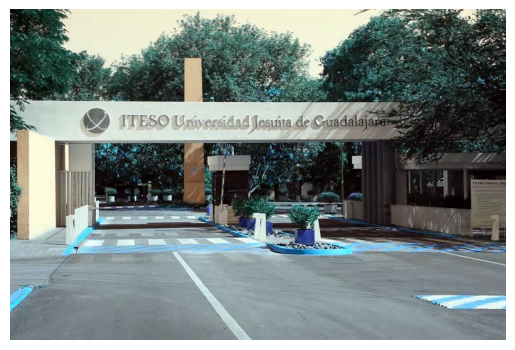

In [13]:
# Visualizaremos la imagen con matplotlib para verla más allá de la matriz. 
plt.figure()
plt.imshow(iteso)
plt.axis('off')
plt.show()

Notemos que los colores están claramente distorsionados.

* `OpenCV` representa las imágenes RGB como arreglos de numpy (matrices) pero **al revés**.
    * RGB <> BGR

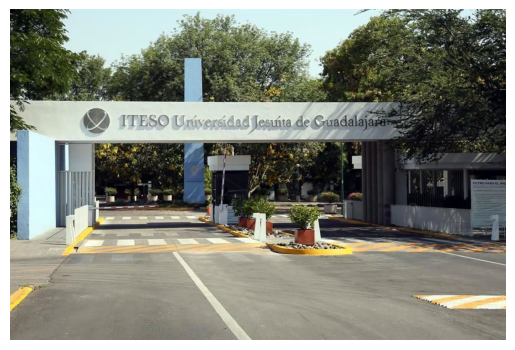

In [14]:
# Voltearemos la imagen con una utilería de la misma librería

# Ahora sí, a graficar

iteso_rgb = cv2.cvtColor(iteso, cv2.COLOR_BGR2RGB)

plt.imshow(iteso_rgb)
plt.axis('off')
plt.show()


Pero, ¿qué representa cada uno de los números de la matriz que vimos al principio?

<img src ='image-in-2d.png' width="400" height="100"/> <img src ='image-in-3d.png' width="400" height="100"/>

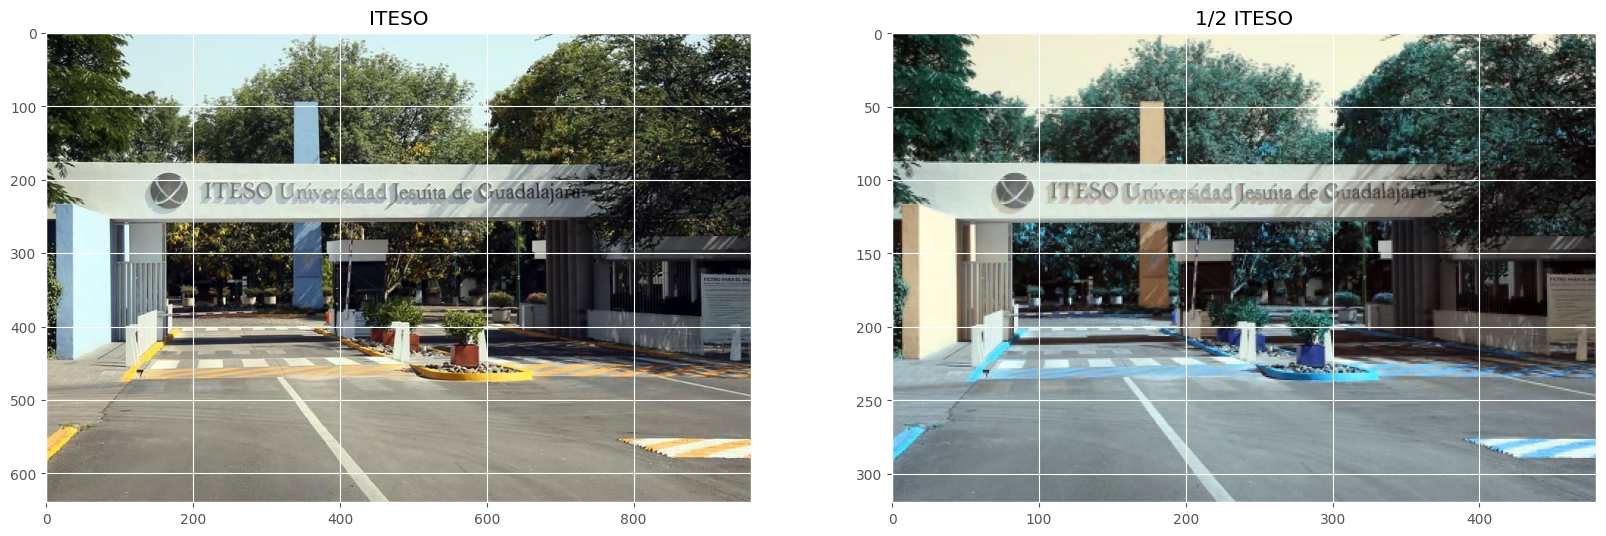

In [15]:
resized = cv2.resize(iteso, (480, 320))

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
ax1.imshow(iteso_rgb)
ax2.imshow(resized)
ax1.set_title('ITESO')
ax2.set_title('1/2 ITESO')
plt.show()

In [5]:
# Pixels size, channels


# Ojo que aquí estamos leyendo los números al revés.

### Resizing, cropping and rotating
#### Resizing

In [7]:
# Usaremos el comando resize, también de cv2

# Al usar esta función,
# el primer elemento es eje horizontal, segundo el vertical.



#### Cropping

In [8]:
# Tomaremos una pequeña porción de la imagen. 
# Importante recordar que de esta manera accedemos primero a Y y luego a X.


In [9]:
# Experimentando con cortes

# Creando copias independientes de la imagen


In [10]:
# Viendo el shape de la sombra 


Supongamos que yo quiero meter la misma imagen (una copia) en el mismo cuadrito.
El shape de la misma fotito es de 640x960, claramente no cabe, hay que resizear (#pocho).

In [11]:
# Creando copia de nuestro iteso_rgb


# Poniendole el resized a nuestro copy2


# Volviendo a graficar la magia



#### Rotating

In [12]:
# Usaremos el comando y métodos prestablecidos para rotar.



### ¿Qué onda con los canales?

Las imágenes, como veíamos, tienen tres canales básicos. Regresemos al shape de nuestra matriz original y notemos que tiene una tercera: 3. 

In [ ]:
# Shape

Esta "tercer dimensión" representa cada uno de los canales, visualicemos cada uno de ellos.

In [13]:
# Visualizando canales.
# Usaremos un cmap (colormap) para ayudarnos a verlos de manera más clara.


### Histogramas de canal
El histograma por canal nos ayuda a ver la distribución de los pixeles, esto nos puede ayudar a ver hacia dónde hay mayor saturación de cada uno de los colores.

In [14]:
# Creando figuras


# Usando ax para ver los histogramas


<img src ='histograms.jpg' width="400" height="100"/>

<img src ='qp2.jpg' width="500" height="500"/>

#### Actividad de tarea
* Tómate una selfie y súbela al mismo directorio donde está guardado este notebook.
* Vas a escoger algún elemento de tu cara y ubicarlo con las coordenadas correspondientes (accediendo a la matriz). 
    * Durante la clase hicimos algo similar cuando _croppeamos_ las letras de la entrada.
* Vas a pegar ese elemento de tu cara en otra parte de tu cara (por ejemplo, un ojo en la frente). Durante la clase ehicimos algo similar con la imagen "ITESO con ITESO dentro (wtf)" Para ello te sugiero seguir los siguientes pasos:
    * Identificar el elemento de tu cara (con sus coordenadas).
    * Identificar la zona donde la vas a pegar. OJO: La zona donde lo vas a pegar tiene que ser del mismo tamaño del elemento que vas a pegar. Para esto vas a tener que usar `resize`.
        * Hicimos un ejemplo de resizing en la imagen "ITESO con ITESO dentro (wtf)".
    * Pegar en la imagen original ese elemento.
    
Te comparto (al final del notebook) el output que se espera con una imagen mía de ejemplo (una disculpa por la cara de desvelado, era de noche cuando hice esto xD).

Lo que se espera es la última imagen (la que dice "Aberración"), yo lo hice por pasos pero no es necesario hacerlo así:

<img src ='ejemplo_tarea.png' width="400" height="100"/>